In [1]:
# import dask array

import dask.array as da

# create Dask Array using arrange() function and generate
# values for 0 t0 17

a = da.arange(18, chunks=4)

# compute the array
a.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [2]:
# check the chunk size
a.chunks

((4, 4, 4, 4, 2),)

In [3]:
# read csv using pandas
import pandas as pd
%time temp = pd.read_csv("HR_comma_sep.csv")

CPU times: total: 15.6 ms
Wall time: 109 ms


In [4]:
# read csv file using Dask
import dask.dataframe as dd
%time df = dd.read_csv("HR_comma_sep.csv")

CPU times: total: 0 ns
Wall time: 180 ms


In [5]:
# DataFrame indexing
# import Dask and Pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# create Pandas DataFrame
df = pd.DataFrame({"P":[10,20,30], "Q": [40, 50,60]},
                 index=['p', 'q', 'r'])

# create Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# check top records
ddf.head()

,P,Q
p,10,40
q,20,50
r,30,60


In [6]:
# single Column Selection
ddf['P']

Dask Series Structure:
npartitions=1
p    int64
r      ...
Name: P, dtype: int64
Dask Name: getitem, 2 tasks

In [8]:
# multiple Column Selection
ddf[['Q', 'P']]

,Q,P
npartitions=1,,
p,int64,int64
r,...,...


In [9]:
# import dask and pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# create pandas DataFrame
df = pd.DataFrame({"X": [11, 12, 13], "Y":[41, 51, 61]})

# create dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# check top records
ddf.head()

,X,Y
0,11,41
1,12,51
2,13,61


In [11]:
ddf.iloc[:, [1,0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [13]:
# filter data
# import dask DataFrame
import dask.dataframe as dd

# read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# see top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
# filter employee with low salary
ddf2 = ddf[ddf.salary=='low']

ddf2.compute().head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [16]:
# groupby
# find the average values of all the columns for employee left
# or stayed
ddf.groupby('left').mean().compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
# converting a pandas DataFrame into a Dask DataFrame
# import Dask DataFrame
from dask import dataframe as dd

# convert pandas dataframe to dask dataframe
ddf = dd.from_pandas(df, chunksize=4)

type(ddf)

dask.dataframe.core.DataFrame

In [20]:
# converting a Dask DataFrame into a pandas DataFrame

# convert dask DataFrame to pandas DataFrame
pd_df = ddf.compute()

type(pd_df)

pandas.core.frame.DataFrame

In [1]:
# dask bags
# import dask bag
import dask.bag as db

# create a bag of list items
items_bag = db.from_sequence([1,2,3,4,5,6,7,8,9,10],
                            npartitions=3)
# take initial two items
items_bag.take(2)

(1, 2)

In [2]:
# filter the bag of list items
items_square = items_bag.filter(lambda x: x if x % 2 != 0 else None)

# compute the results
items_square.compute()

[1, 3, 5, 7, 9]

In [3]:
# creating a dask bag using a text file

# import dask bag
import dask.bag as db

# create a bag of text file
text = db.read_text('sample.txt')

# show initial 2 items from text
text.take(2)

('Hi! how are you? \n', '\n')

In [8]:
# storing a dask bag in a DataFrame
# import dask bag
import dask.bag as db

# create a bag od dictionary items
dict_bag = db.from_sequence([{'item_name': 'Egg', 'price': 5},
                             {'item_name': 'Bread', 'price': 20},{'item_name': 'Milk', 'price': 54}],
                           npartitions=2)
# convert bag object into dataframe
df = dict_bag.to_dataframe()

# execute the graph results
df.compute()

,item_name,price
0,Egg,5
1,Bread,20
0,Milk,54


In [11]:
# dask delayed

# import dask delayed and compute
from dask import delayed, compute

# create delayed function
@delayed
def cube(item):
    return item ** 3

# create delayed function
@delayed
def average(items):
    return sum(items)/len(items)

# create a list
item_list = [2,3,4]

# compute cube of given item list
cube_list = [cube(i) for i in item_list]

# compute average of cube_list
computation_graph = average(cube_list)

# compute the results
computation_graph.compute()

33.0

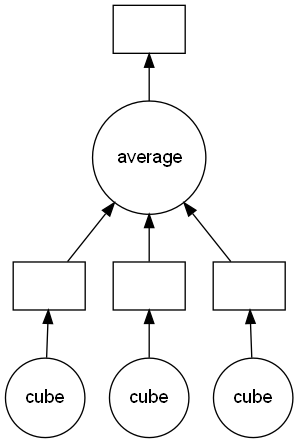

In [15]:
# compute the results
computation_graph.visualize()

In [14]:
# preprocessing data at scale

# feature scaling in dask
# import dask DataFrame
import dask.dataframe as dd

# read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# see top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instatiate the MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0,100))

# fit the data on Scaler
scaler.fit(ddf[['last_evaluation']])

# transform the data
perfomance_score = scaler.transform(ddf[['last_evaluation']])

# let's see the scaled performance score
perfomance_score

array([[26.5625],
       [78.125 ],
       [81.25  ],
       ...,
       [26.5625],
       [93.75  ],
       [25.    ]])

In [19]:
# feature encoding in dask
# import dask DataFrame

import dask.dataframe as dd

# read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# see top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
# rest in the book